In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.rename(columns={'NA_Sales': 'North_America_Sales', 'EU_Sales': 'Europe_Sales', 'JP_Sales': 'Japan_Sales', 'Other_Sales': 'Other_Regions_Sales', 'Global_Sales': 'Total_Sales'}, inplace=True)

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'North_America_Sales', 'Europe_Sales', 'Japan_Sales',
       'Other_Regions_Sales', 'Total_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
df.shape

(16719, 16)

In [6]:
df.isnull().sum()

Name                      2
Platform                  0
Year_of_Release         269
Genre                     2
Publisher                54
North_America_Sales       0
Europe_Sales              0
Japan_Sales               0
Other_Regions_Sales       0
Total_Sales               0
Critic_Score           8582
Critic_Count           8582
User_Score             6704
User_Count             9129
Developer              6623
Rating                 6769
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(6825, 16)

In [10]:
df.to_csv('mydataset1.csv', index=False)

In [11]:
# Summary statistics of the data
df.describe()




,Year_of_Release,North_America_Sales,Europe_Sales,Japan_Sales,Other_Regions_Sales,Total_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


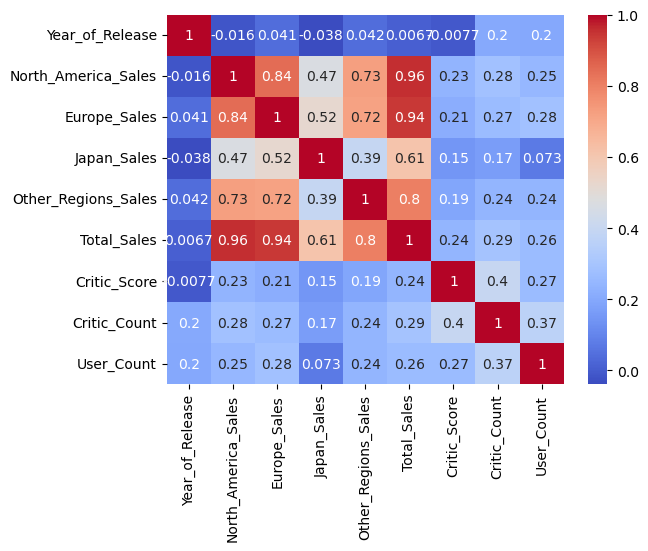

In [12]:
# Correlation matrix of the data
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('plot.png')
plt.show()

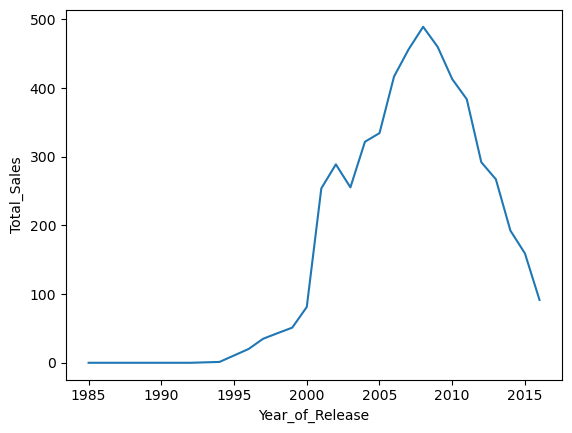

In [13]:
# Line plot of the total sales over time
sales_over_time = df.groupby('Year_of_Release')['Total_Sales'].sum()
sns.lineplot(data=sales_over_time)
plt.savefig('plot1.png')
plt.show()
#Expected result: We should see a line plot showing the total sales over time, with the x-axis representing the years and the y-axis representing the total sales in millions of units. We expect to see a general increase in sales over time, which would support Hypothesis 1.

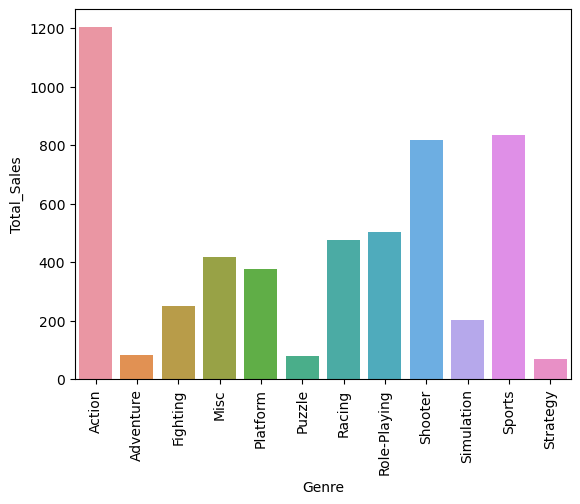

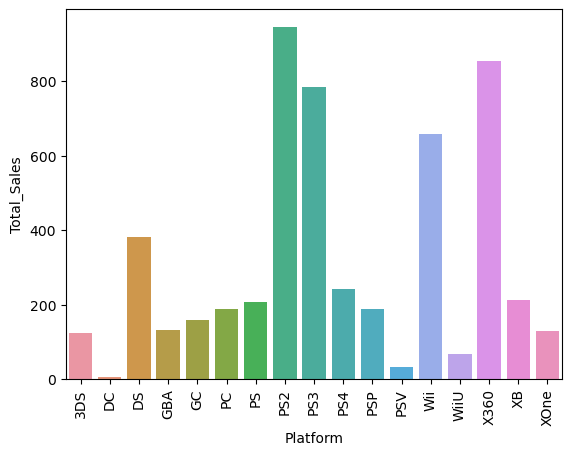

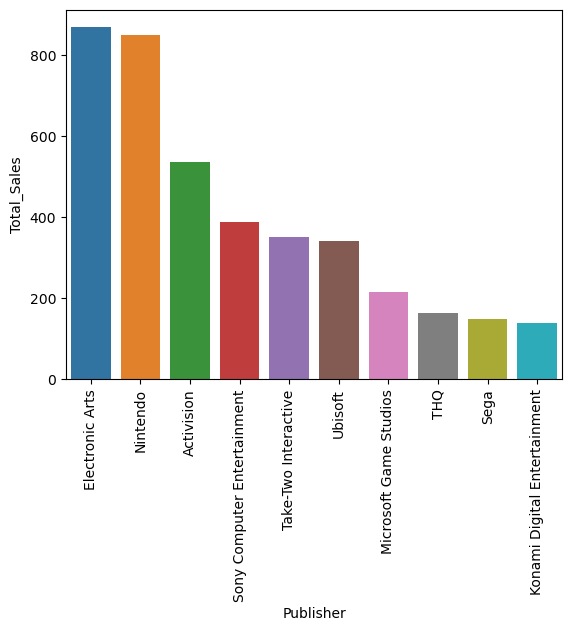

In [14]:
# Bar plot of the total sales by genre
sales_by_genre = df.groupby('Genre')['Total_Sales'].sum().reset_index()
ax = sns.barplot(data=sales_by_genre, x='Genre', y='Total_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('plot2.png')
plt.show()

# Bar plot of the total sales by platform
sales_by_platform = df.groupby('Platform')['Total_Sales'].sum().reset_index()
ax = sns.barplot(data=sales_by_platform, x='Platform', y='Total_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('plot3.png')
plt.show()

# Bar plot of the total sales by publisher
sales_by_publisher = df.groupby('Publisher')['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending=False).head(10)
ax = sns.barplot(data=sales_by_publisher, x='Publisher', y='Total_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('plot4.png')
plt.show()

##Expected results: We should see three bar plots showing the total sales by genre, platform, and publisher, respectively. We expect to see certain genres, platforms, and publishers consistently appearing at the top, which would support Hypothesis 1.

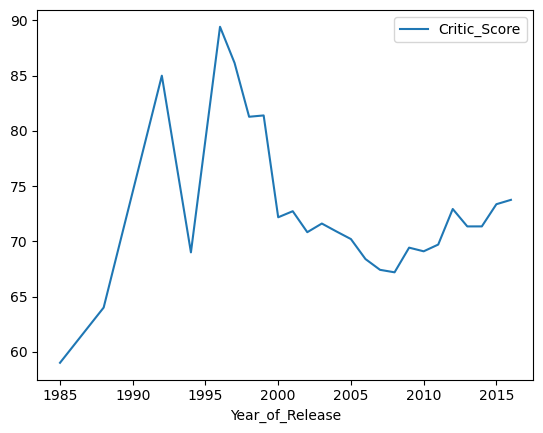

In [15]:
# Line plot of the average critic and user scores over time
scores_over_time = df.groupby('Year_of_Release')[['Critic_Score', 'User_Score']].mean()
sns.lineplot(data=scores_over_time)
plt.savefig('plot5.png')
plt.show()
#Expected result: We should see a line plot showing the average Metacritic score over time, with the x-axis representing the years and the y-axis representing the average Metacritic score. We expect to see a general increase in Metacritic scores over time, which would support Hypothesis 1.


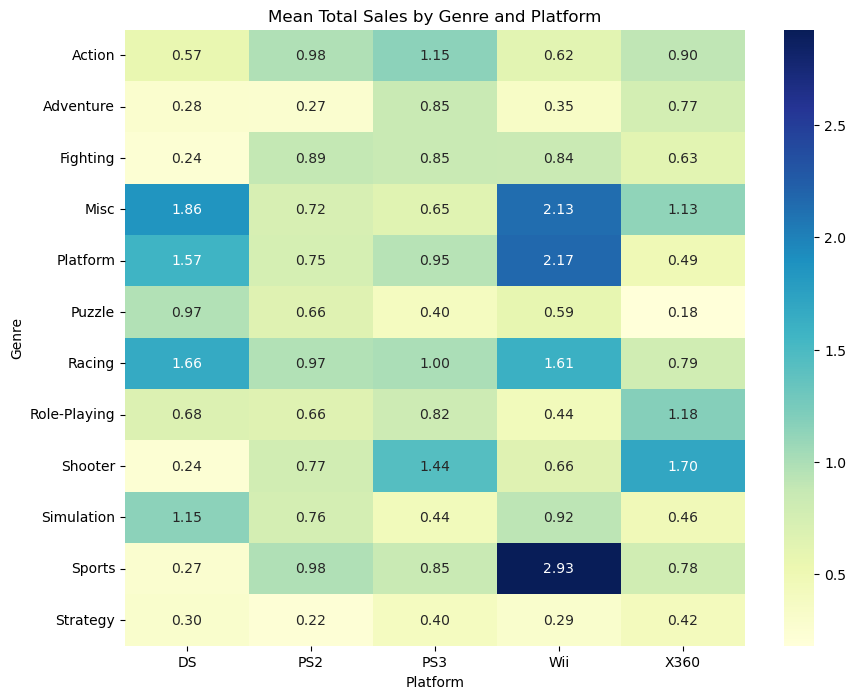

In [16]:
# Filter by top-selling platforms
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_platforms = df[df['Platform'].isin(top_platforms)]

# Group by genre and platform, and calculate mean total sales
df_sales = df_platforms.groupby(['Genre', 'Platform'])['Total_Sales'].mean().reset_index()

# Pivot the data to create a heatmap
sales_pivot = df_sales.pivot(index='Genre', columns='Platform', values='Total_Sales')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Mean Total Sales by Genre and Platform')
plt.savefig('plot6.png')
plt.show()

In [17]:
df = df[['Year_of_Release', 'Platform']]
df = df.dropna()


In [18]:
platforms = df.groupby(['Year_of_Release', 'Platform']).size().reset_index(name='Count')


In [19]:
platform_counts = platforms.pivot(index='Year_of_Release', columns='Platform', values='Count')


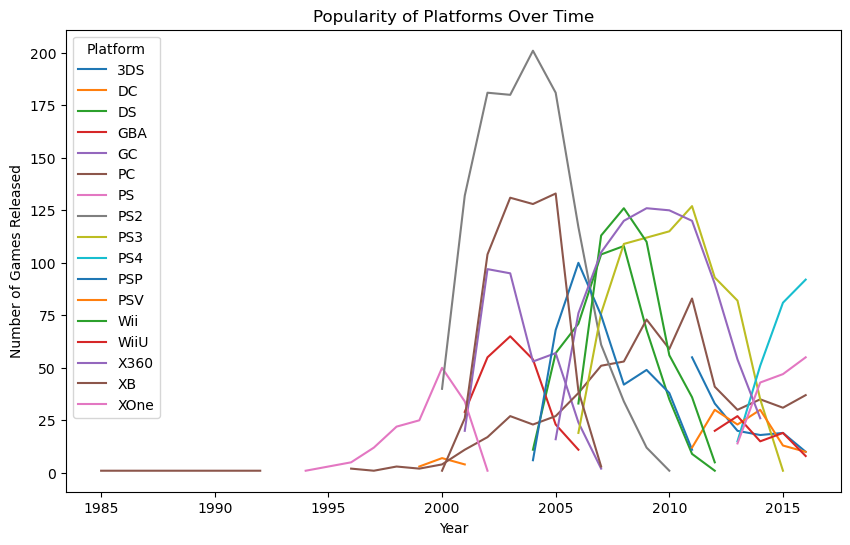

In [20]:
platform_counts.plot(kind='line', figsize=(10, 6))
plt.title('Popularity of Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.savefig('plot7.png')
plt.show()


In [21]:
df.shape


(6825, 2)